In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./housing.csv
./.config/config_sentinel
./.config/active_config
./.config/.last_update_check.json
./.config/.last_opt_in_prompt.yaml
./.config/.last_survey_prompt.yaml
./.config/gce
./.config/logs/2022.12.08/14.34.49.685988.log
./.config/logs/2022.12.08/14.36.17.308550.log
./.config/logs/2022.12.08/14.35.49.336173.log
./.config/logs/2022.12.08/14.36.16.510386.log
./.config/logs/2022.12.08/14.35.14.463828.log
./.config/logs/2022.12.08/14.35.41.137258.log
./.config/configurations/config_default
./sample_data/README.md
./sample_data/anscombe.json
./sample_data/mnist_train_small.csv
./sample_data/mnist_test.csv
./sample_data/california_housing_test.csv
./sample_data/california_housing_train.csv


In [ ]:
# importing standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('./housing.csv')
# First 5 row will print of the data
df.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


In [ ]:
# The Information od the data will print
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384977 entries, 0 to 384976
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       384977 non-null  int64  
 1   url                      384977 non-null  object 
 2   region                   384977 non-null  object 
 3   region_url               384977 non-null  object 
 4   price                    384977 non-null  int64  
 5   type                     384977 non-null  object 
 6   sqfeet                   384977 non-null  int64  
 7   beds                     384977 non-null  int64  
 8   baths                    384977 non-null  float64
 9   cats_allowed             384977 non-null  int64  
 10  dogs_allowed             384977 non-null  int64  
 11  smoking_allowed          384977 non-null  int64  
 12  wheelchair_access        384977 non-null  int64  
 13  electric_vehicle_charge  384977 non-null  int64  
 14  come

In [ ]:
# Print the Sum of the null value of the attributes
df.isna().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             79026
parking_options            140687
image_url                       0
description                     2
lat                          1918
long                         1918
state                           0
dtype: int64

In [ ]:
# Before using the null values let's remove the unwanted features as these features does not play any role in the estimation of house rent
df=df.drop(["id","url","region_url","image_url","description"],axis=1)

In [ ]:
# The Region is already reveal State Value so we can remove it
df=df.drop(["state"],axis=1)

In [ ]:
# Fill the missing value with the mean of the attributes
df['laundry_options'] = df['laundry_options'].fillna(df['laundry_options'].mode()[0])
df['parking_options'] = df['parking_options'].fillna(df['parking_options'].mode()[0])
df['lat'] = df['lat'].fillna(df['lat'].mean())
df['long'] = df['long'].fillna(df['long'].mean())

In [ ]:
df.isnull().sum()*100/len(df)

region                     0.0
price                      0.0
type                       0.0
sqfeet                     0.0
beds                       0.0
baths                      0.0
cats_allowed               0.0
dogs_allowed               0.0
smoking_allowed            0.0
wheelchair_access          0.0
electric_vehicle_charge    0.0
comes_furnished            0.0
laundry_options            0.0
parking_options            0.0
lat                        0.0
long                       0.0
dtype: float64

In [ ]:
df.laundry_options.value_counts()

w/d in unit           210809
w/d hookups            75568
laundry on site        58873
laundry in bldg        36103
no laundry on site      3624
Name: laundry_options, dtype: int64

In [ ]:
df.parking_options.value_counts()

off-street parking    269189
attached garage        40591
carport                38955
detached garage        16940
street parking         15951
no parking              3188
valet parking            163
Name: parking_options, dtype: int64

In [ ]:
df.region.value_counts()

jacksonville      4246
columbus          3738
rochester         3677
jackson           3667
fayetteville      3652
                  ... 
southwest MS        12
st louis             9
southwest TX         9
fort smith, AR       5
kansas city          3
Name: region, Length: 404, dtype: int64

In [ ]:
df.type.value_counts()

apartment          318032
house               33266
townhouse           15885
condo                6238
duplex               5047
manufactured         4242
cottage/cabin         861
loft                  693
flat                  531
in-law                172
land                    8
assisted living         2
Name: type, dtype: int64

apartment          318032
house               33266
townhouse           15885
condo                6238
duplex               5047
manufactured         4242
cottage/cabin         861
loft                  693
flat                  531
in-law                172
land                    8
assisted living         2
Name: type, dtype: int64


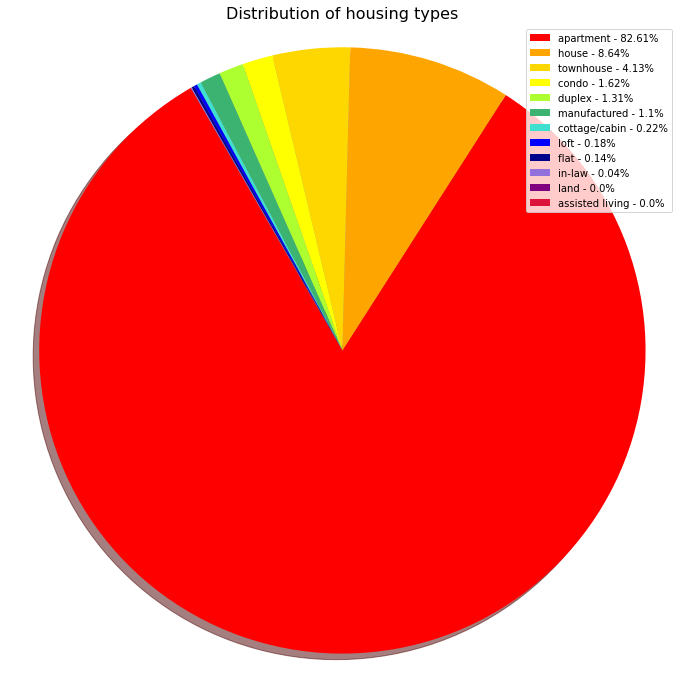

In [ ]:
#Pie charts for housing type and laundry/parking options
#Lets wrap it up with pie charts depicting the makeup of housing types and laundry/parking options. Percentages in the legends reflect the overall percentage out of all rows in the dataset, they don't always add up to 100% as some entries are null.

fig = plt.gcf()
fig.set_size_inches(12, 12)
baseColors = ["red", "orange", "gold", "yellow", "greenyellow", "mediumseagreen", "turquoise", "blue", "darkblue", "mediumpurple", "purple", "crimson"]
types = dict(df.type.value_counts())
print(df.type.value_counts())
labels = []
sizes = []
colors = []
count = 0
for k, v in types.items():
    labels.append(f"{k} - {round(((v / df.shape[0]) * 100), 2)}%")
    sizes.append(v)
    colors.append(baseColors[count])
    count += 1

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=120)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.title("Distribution of housing types", fontsize = 16)
plt.show()

In [ ]:
df.baths.value_counts()

1.0     198184
2.0     134649
1.5      27363
2.5      13162
3.0       5549
0.0       3107
4.0       1495
3.5       1007
4.5        231
5.0        131
5.5         57
6.0         26
7.0          4
6.5          4
75.0         2
7.5          2
8.5          1
35.0         1
8.0          1
25.0         1
Name: baths, dtype: int64

In [ ]:
df['baths']=df['baths'].astype('int')

In [ ]:
df.beds.value_counts()

2       175513
1       117226
3        67037
4        11575
0        10978
5         2324
6          240
7           49
8           31
1000         2
1100         2
Name: beds, dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,384977.0,8825.722318,4.462200e+06,0.0000,805.0000,1036.0000,1395.0000,2.768307e+09
sqfeet,384977.0,1059.899565,1.915076e+04,0.0000,750.0000,949.0000,1150.0000,8.388607e+06
beds,384977.0,1.905345,3.494572e+00,0.0000,1.0000,2.0000,2.0000,1.100000e+03
baths,384977.0,1.426394,6.018310e-01,0.0000,1.0000,1.0000,2.0000,7.500000e+01
cats_allowed,384977.0,0.726890,4.455574e-01,0.0000,0.0000,1.0000,1.0000,1.000000e+00
dogs_allowed,384977.0,0.707918,4.547206e-01,0.0000,0.0000,1.0000,1.0000,1.000000e+00
smoking_allowed,384977.0,0.731771,4.430381e-01,0.0000,0.0000,1.0000,1.0000,1.000000e+00
wheelchair_access,384977.0,0.082111,2.745347e-01,0.0000,0.0000,0.0000,0.0000,1.000000e+00
electric_vehicle_charge,384977.0,0.012871,1.127177e-01,0.0000,0.0000,0.0000,0.0000,1.000000e+00
comes_furnished,384977.0,0.048128,2.140360e-01,0.0000,0.0000,0.0000,0.0000,1.000000e+00


In [ ]:
# Remove the outliers from data such as a set limit for the beds and baths in the house.
outlier1 = ((df["beds"]>4) | (df["baths"]>4))
print("There is {} outlier".format(df[outlier1]["beds"].count()))

There is 2705 outlier


In [ ]:
df = df[~outlier1]

In [ ]:
outlier2 = ((df["sqfeet"]<120) | (df["sqfeet"]>5000) | (df["price"]<100) | (df["price"]>10000))
print("There is {} outlier".format(df[outlier2]["cats_allowed"].count()))

There is 3564 outlier


In [ ]:
df = df[~outlier2]
df.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,378708.000000,378708.000000,378708.000000,378708.000000,378708.000000,378708.000000,378708.000000,378708.000000,378708.000000,378708.000000,378708.000000,378708.000000
mean,1182.050028,985.397074,1.871183,1.418607,0.729335,0.709850,0.732100,0.082441,0.012965,0.047189,37.225018,-92.686089
std,578.570298,358.886606,0.836630,0.559848,0.444304,0.453832,0.442866,0.275036,0.113124,0.212044,5.534498,16.493729
min,100.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,810.000000,750.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.466900,-99.772400
50%,1040.000000,947.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.560950,-87.855900
75%,1395.000000,1144.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.127700,-81.225600
max,9999.000000,5000.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


In [ ]:
# Perfome the Data Transformation techniques on the dataset as a merge cat_allowes and dog_allowed as a pet_allowed attribute.
df=df.drop(["cats_allowed"],axis=1)
df.rename(columns = {'dogs_allowed':'pets_allowed'}, inplace = True)


```
# Label Encoding the categorical string values of the attributes such as region, type, laundry and parking options

```



In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
db=df
db["region"]=le.fit_transform(df["region"])
db["type"]=le.fit_transform(df["type"])
db["laundry_options"]=le.fit_transform(df["laundry_options"])
db["parking_options"]=le.fit_transform(df["parking_options"])

In [ ]:
db.head()

,region,price,type,sqfeet,beds,baths,pets_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long
0,286,1148,0,1078,3,2,1,0,0,0,0,4,1,39.5483,-119.796
1,286,1200,2,1001,2,2,0,0,0,0,0,3,1,39.5026,-119.789
2,286,1813,0,1683,2,2,1,1,0,0,0,4,0,39.6269,-119.708
3,286,1095,0,708,1,1,1,1,0,0,0,4,1,39.4477,-119.771
4,286,289,0,250,0,1,1,1,1,0,1,1,4,39.5357,-119.805



#2.Data Visualization

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Which type of house is more')

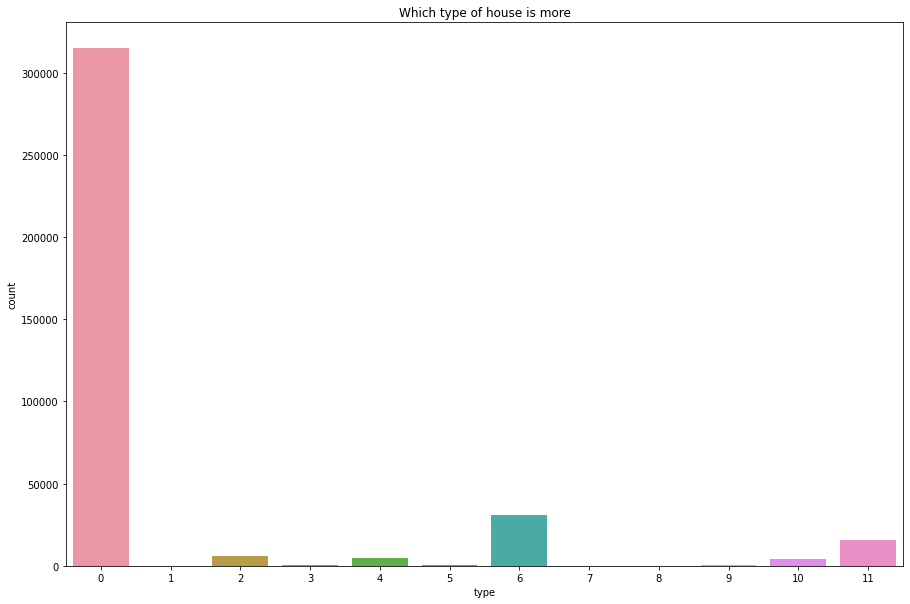

In [ ]:
sns.countplot(df["type"])
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Which type of house is more')

Text(0.5, 1.0, 'Which type of house has more price')

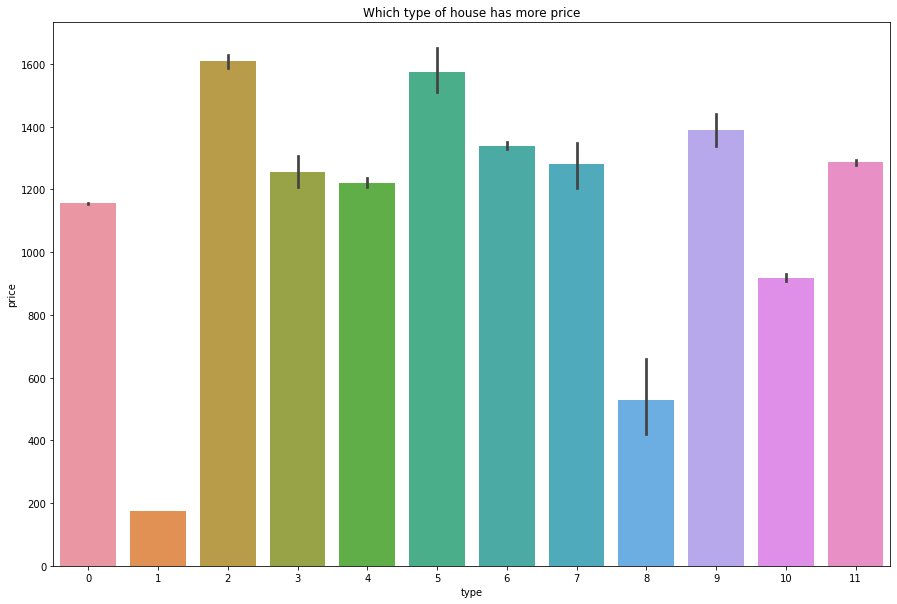

In [ ]:
sns.barplot(x=df["type"],y=df["price"])
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Which type of house has more price')

Text(0.5, 1.0, 'Which type of house has more sqfeet')

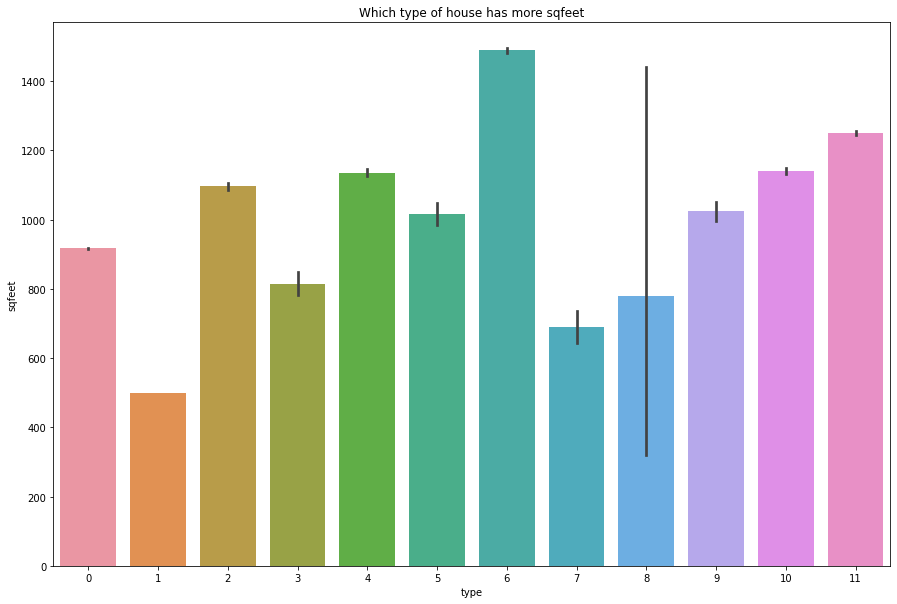

In [ ]:
sns.barplot(x=df["type"],y=df["sqfeet"])
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Which type of house has more sqfeet')

Text(0.5, 1.0, 'Which type of parking option has more price')

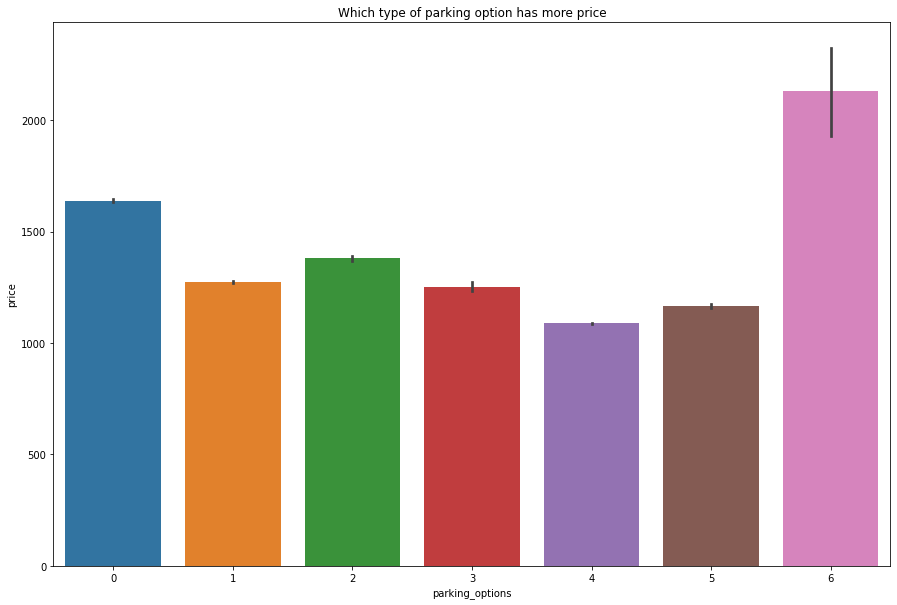

In [ ]:
sns.barplot(x=df["parking_options"],y=df["price"])
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Which type of parking option has more price')

In [ ]:
# Define the independent and dependent variable from the dataset

In [ ]:
x=db.drop(columns=["price"])
y=db["price"]

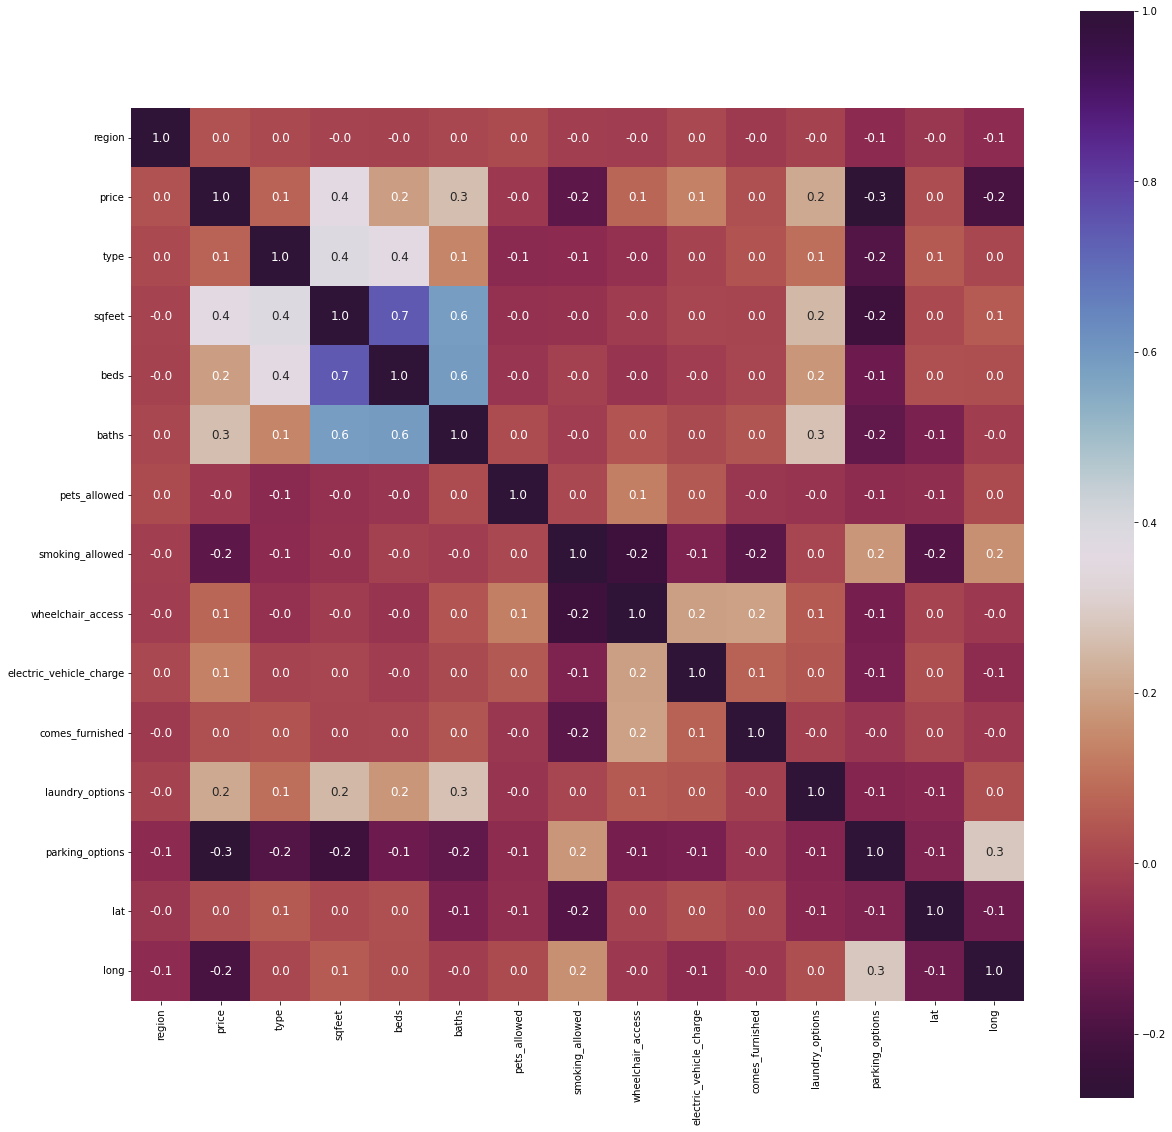

In [ ]:
# Generate the Heatmap of the dataset.
corrl = db.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrl, cbar=True, square= True,fmt='.1f', annot=True, annot_kws={'size':12}, cmap='twilight_shifted_r')

In [ ]:
# Using Sklearn library we split the data set in 70:30 ratio and apply those dataset to the model.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state=470)

# Import and Apply the dataset to the model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
dtr = DecisionTreeRegressor()
ran = RandomForestRegressor(n_estimators=20)
lin = LinearRegression()
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 20,max_depth=5,min_samples_split=2, learning_rate=0.1,loss='ls')

In [ ]:
models = {"Decision tree" : dtr,
          "Random forest" : ran,
          "Linear Regression" : lin,
          "Gradient Boosting Regressor" : clf}
scores= { }

In [ ]:
for key, value in models.items():
    model = value
    model.fit(x_train, y_train)
    scores[key] = model.score(x_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


In [ ]:
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
Random forest,0.858939
Decision tree,0.752847
Gradient Boosting Regressor,0.572723
Linear Regression,0.250358


# Model Evaluation

In [ ]:
# here we try to Evulate the model using following techniques.
y_pred=ran.predict(x_test)
from sklearn import metrics
print('R^2:',metrics.r2_score(y_test, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.8589390712876641
Adjusted R^2: 0.8589316212612496
MAE: 83.52793505074735
MSE: 47302.628726476796
RMSE: 217.49167507395956


# Conclusion
By comparing the above results we can take the Random forest Regressor for the estimation of house rent, with Random forrest regressor we can estimate the house rent with 86% accuracy